In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_gender = pd.read_csv('/Users/Oh/Documents/CodeAcademyBerlin/titanic_EDA/datasets/gender_submission.csv')
df_test = pd.read_csv('/Users/Oh/Documents/CodeAcademyBerlin/titanic_EDA/datasets/test.csv')
df_train = pd.read_csv('/Users/Oh/Documents/CodeAcademyBerlin/titanic_EDA/datasets/train.csv')


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for missing values per column
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# We've seen that there are a lot of missing ages. 
# We want to see if we can infer some of them – at least whether they are children or adults.

df_train_missing_ages = df_train[df_train['Age'].isna()]    # Select rows with missing age.
condition_with_family = (df_train_missing_ages['SibSp'] != 0) | (df_train_missing_ages['Parch'] != 0) # Either 'SibSp' != or 'Parch' != 0
df_train_missing_ages[condition_with_family].head()  # There are 44 entries

# But, data provided is all jumbled up. 
# 'SibSp' refers to either sibling OR spouse. 
# 'Parch' refers to either parent OR child. 
# If someone had siblings and parents, we could infer they're a child (below 18). 
# Or if they had a spouse and children, we could infer they're an adult (above 18).
# But we can't distinguish between parent / child, or between sibling / spouse.  



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


In [7]:
# Select passengers with 'Parch' > 0: 
df_with_Parch = df_train[df_train['Parch']>0]
df_with_Parch.head(10)

# We see for example in row 8, a woman who's 27 with 'Parch' = 2. Is she on holiday with two parents? Or with two young children? 
# In row 13, we have a Mr. Andersson, aged 39, with 'SibSp' =1, 'Parch' = 5. We could safely infer that he's there with wife and 5 children. 

df_with_Parch.sort_values(by = 'Name').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.25,NaN,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,392091,9.35,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S


In [8]:
# Take closer look at passengers with family. 
condition_with_family = (df_train['SibSp'] != 0) | (df_train['Parch'] != 0)

df_with_family = df_train[condition_with_family]

# sort by name, so family members follow one another. 

df_with_family = df_with_family.sort_values(by = 'Name')
df_with_family.head()

# Going through list, it seems not all family members are in the data set. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.250,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.250,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.000,NaN,C
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.475,NaN,S


<AxesSubplot:ylabel='Frequency'>

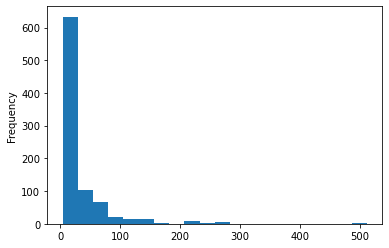

In [9]:
# Filter out rows where Fare == 0
# Select 'Fare' column and plot histogram

df_fares_not_missing = df_train [df_train['Fare'] != 0]

df_fares_not_missing['Fare'].plot(kind = 'hist', bins = 20)



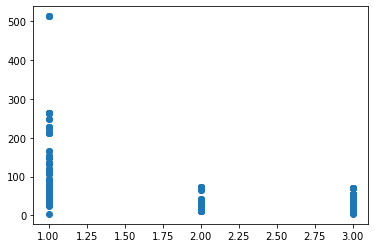

In [10]:
# Scatter plot: 'Pclass' vs 'Fare'

plt.scatter(df_fares_not_missing['Pclass'], df_fares_not_missing['Fare'])
plt.show()

In [11]:
# Count number of rows where ticket fare = 0 (corrupt data)
df_train[df_train['Fare']==0].count()['PassengerId']

15

In [12]:
# Summary stats on ticket fare for each passenger class. 

df_fares_not_missing.groupby('Pclass').agg({'Fare':['mean', 'min','max', 'median']})

Fare                            
             mean      min       max   median
Pclass                                       
1       86.148874   5.0000  512.3292  61.9792
2       21.358661  10.5000   73.5000  15.0229
3       13.787875   4.0125   69.5500   8.0500

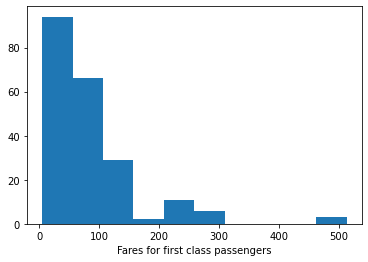

In [13]:
# Histogram of prices for first class passengers

plt.hist (df_fares_not_missing [df_fares_not_missing['Pclass']== 1]['Fare'])
plt.xlabel ('Fares for first class passengers')
plt.show()

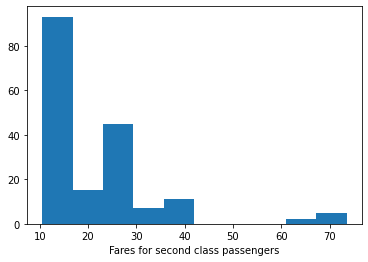

In [14]:
# Histogram of prices for second class passengers

plt.hist (df_fares_not_missing [df_fares_not_missing['Pclass']== 2]['Fare'])
plt.xlabel ('Fares for second class passengers')
plt.show()

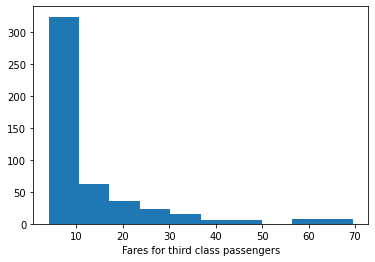

In [15]:
# Histogram of prices for third class passengers

plt.hist (df_fares_not_missing [df_fares_not_missing['Pclass']== 3]['Fare'])
plt.xlabel ('Fares for third class passengers')
plt.show()

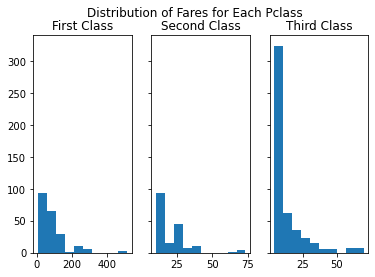

'\nBLOCKER:\nWould be nice to have the range of the x-axis consistent across all three plots. \nAlso would be nice to change the font size of the titles.\n'

In [16]:
# All three histograms side by side

"""
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)
"""

fig, axs = plt.subplots(1, 3, sharey = True)
fig.suptitle ('Distribution of Fares for Each Pclass')
axs[0].hist(df_fares_not_missing [df_fares_not_missing['Pclass']== 1]['Fare'], bins = 10)
axs[0].set_title('First Class')
axs[1].hist(df_fares_not_missing [df_fares_not_missing['Pclass']== 2]['Fare'], bins = 10)
axs[1].set_title('Second Class')
axs[2].hist(df_fares_not_missing [df_fares_not_missing['Pclass']== 3]['Fare'],bins = 10)
axs[2].set_title('Third Class')
plt.show()

# We see:
# 1) Way more third-class passengers
# 2) Price range for second- and third-class tickets roughly similar
# 3) Price range for first-class tickets way higher.

"""
BLOCKER:
Would be nice to have the range of the x-axis consistent across all three plots. 
Also would be nice to change the font size of the titles.
"""

In [41]:
# Sort passengers into age categories based on age. 
#        age < 18:   'Child'
#  18 =< age < 65:  'Adult'
#  65 =< age:       'Senior'
#  If the age is missing (NaN), sort into category 'Unknown'.

"""
Using a lambda function would make the line too long. 
So I define a new function "sort_age". 
Function "sort_age" was written and tested in following cell, then pasted into this one.
"""

def sort_age(age):
    if np.isnan(age):           # If age is missing (i.e. is NaN)
        return 'Unknown'
    elif age <18:
        return 'Child'
    elif age >= 18 and age < 65:
        return 'Adult'
    else:
        return 'Senior'
        

# Create new column "Age_Category"
df_train['Age_Category'] = df_train['Age'].map(sort_age)    # Plug in "sort_age()" function into map method. 
df_train.head(10)

condition = (df_train['Pclass'] == 1) & (df_train['Fare'] < 30) & (df_train['Fare'] > 0)
df_train[condition]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Died
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Adult,0
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Adult,1
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Unknown,1
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,Adult,0
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Unknown,1
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,Adult,1
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,Adult,0
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C,Adult,0
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,Adult,1
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C,Adult,1


In [18]:
# Create function for sorting ages

# Test list
age_list = [12, 18, 40, 65, 66, np.nan]

# Define function
def sort_age(age):
    if np.isnan(age):           # If age is missing (i.e. is NaN)
        return 'Unknown'
    elif age <18:
        return 'Child'
    elif age >= 18 and age < 65:
        return 'Adult'
    else:
        return 'Senior'

categories = map(sort_age, age_list)    # Create iterator (map object)
for cat in categories:                  # Print each element
    print (cat)

Child
Adult
Adult
Senior
Senior
Unknown


In [19]:
df_train['Died'] = df_train['Survived'].apply(lambda x: 0 if x == 1 else 1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [20]:
# Count number of survivors per Age_Category
df_train.groupby('Age_Category').agg({'Died': 'sum', 'Survived':['sum','mean']})

# We see:
# Less than half of adults (18–65) survived
# Over half of children (<18) survived – children were prioritised during rescue operations
# Most elderly passengers died, but there are fewer samples. 



Died Survived          
              sum      sum      mean
Age_Category                        
Adult         362      228  0.386441
Child          52       61  0.539823
Senior         10        1  0.090909
Unknown       125       52  0.293785

In [21]:
# Group by age category and survival, and count passengers.

df_train.groupby(['Age_Category']).agg(Survival_Percentage = ('Survived', lambda x: round(x.mean() * 100, 2)))

# Children had highest survival rate. 
# Then adults, then elderly.




,Survival_Percentage
Age_Category,
Adult,38.64
Child,53.98
Senior,9.09
Unknown,29.38


In [22]:
# Count total passengers who survived vs didn't survive

df_train.groupby('Survived').agg(Passenger_counts = ('PassengerId','count'))

,Passenger_counts
Survived,
0,549
1,342


In [23]:
"""
Trick to display multiple commands from one cell:
Use "display"
"""

display(df_train.shape)
display(df_train.head())

(891, 14)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


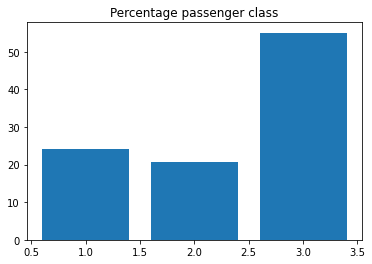

'\nNext step: \nCosmetics ... figure out how to adjust width of the bars. \n'

In [24]:
# See breakdown of passenger class

series_class = df_train['Pclass'].value_counts(normalize = True)    # This creates pandas Series


df_class = pd.DataFrame(series_class).reset_index()    # Convert series into data frame. 
                                            # Need to call reset_index(). Otherwise the 'Pclass' is used as index,
                                            #  leaving us with a single-column dataframe.

df_class.columns = ['Passenger Class', 'Percent']   # Set the column labels
df_class = df_class.sort_values(by = 'Passenger Class')        # Sort by passenger class
df_class['Percent'] = df_class['Percent'].apply(lambda x: round (x*100,2))  # Convert ratio into percentage

plt.bar(df_class['Passenger Class'], df_class['Percent'])
plt.title('Percentage passenger class')
plt.show()

"""
Next step: 
Cosmetics ... figure out how to adjust width of the bars. 
"""

<AxesSubplot:xlabel='Passenger Class'>

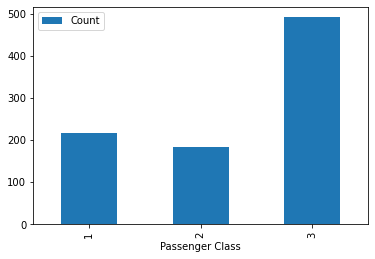

In [25]:
# Count and plot number of passengers per class

series_class = df_train['Pclass'].value_counts()

df_class = pd.DataFrame(series_class).reset_index()
df_class.columns = ['Passenger Class', 'Count']
df_class = df_class.sort_values(by = 'Passenger Class')
df_class.plot(kind='bar', x = 'Passenger Class', y = 'Count')




'\nBut then, how to label the axes?\n'

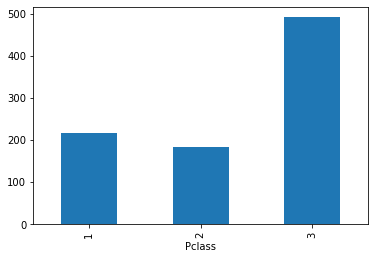

In [26]:
# Same thing as above, but in one line.
df_train.groupby('Pclass')['PassengerId'].nunique().plot(kind='bar')

"""
But then, how to label the axes?
"""

In [27]:
# Select rows where 'Cabin' value is not missing. 
# Then see what ticket class they had.

df_with_cabin = df_train [~df_train['Cabin'].isna()]                        # Select rows where 'Cabin' value is NOT a NaN. 
df_with_cabin['Pclass'].value_counts(normalize=True).apply(lambda x: x*100)   # Calculate percentage of passengers in each class.

# OK, so majority of passengers with a cabin had a first-class ticket.

1    86.274510
2     7.843137
3     5.882353
Name: Pclass, dtype: float64

<AxesSubplot:xlabel='Pclass'>

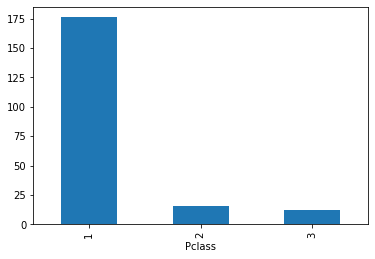

In [28]:
# Plot number of passengers per 'Pclass'
df_train [~df_train['Cabin'].isna()].groupby('Pclass')['PassengerId'].nunique().plot(kind = 'bar')

# Vast majority of those with a cabin were in first class

<AxesSubplot:xlabel='Pclass'>

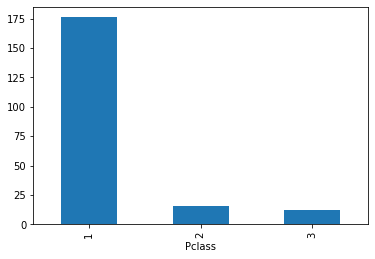

In [29]:
# Could also use the fact that I created df_with_cabin dataframe above: 

df_with_cabin.groupby('Pclass').nunique()['PassengerId'].plot(kind = 'bar')

<AxesSubplot:>

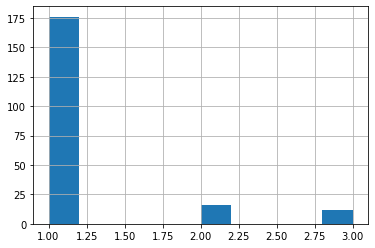

In [30]:
# Or plot directly as a histogram: 

df_with_cabin['Pclass'].hist()


In [31]:
# Create new column 'Died' in dataframe
# If survived == 0, died == 1.

df_train['Died'] = df_train['Survived'].map(lambda x: 1 if x ==0 else 0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


,Survived,Died
Sex,,
female,233,81
male,109,468


<AxesSubplot:xlabel='Sex'>

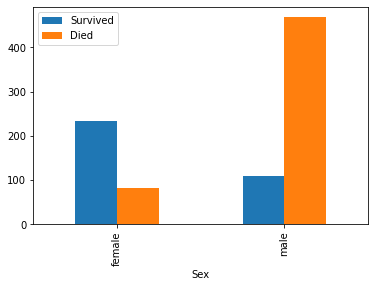

In [32]:

# group by sex, count passengers who survived 
df_survived_by_sex = df_train[df_train['Survived']==1].groupby(['Sex']).agg({'Survived':'count'}) 

# group by sex, count passengers who died 
df_died_by_sex = df_train[df_train['Survived']==0].groupby(['Sex']).agg({'Died':'count'})

# concatenage two dataframes above
df_survived_and_died = pd.concat([df_survived_by_sex, df_died_by_sex], axis = 1 )

display (df_survived_and_died)
df_survived_and_died.plot(kind = 'bar')     # Majority of women survived; majority of men died


In [33]:
# Select rows where 'Age' is missing and save as new DF (df_age_missing)
df_age_missing = df_train[df_train.Age.isna()]



<AxesSubplot:xlabel='Pclass'>

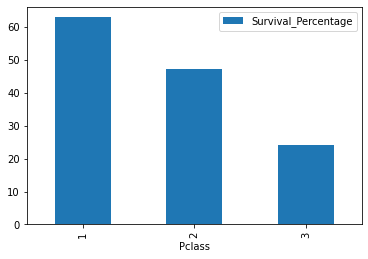

In [34]:
# See survival rate by passenger class.
df_survival_by_class = df_train.groupby('Pclass').agg(Survival_Percentage = ('Survived',lambda x: round (x.mean()*100,2)))
# Note: It's important to calculate the percentage of survival, rather than absolute count, 
# since the different classes contain different numbers of passengers. 
# (i.e. Need to normalise)


df_survival_by_class.plot(kind = 'bar')
# We see clear correlation between class and survival rate.



<AxesSubplot:xlabel='Sex'>

<AxesSubplot:xlabel='Sex'>

<AxesSubplot:xlabel='Sex,Pclass'>

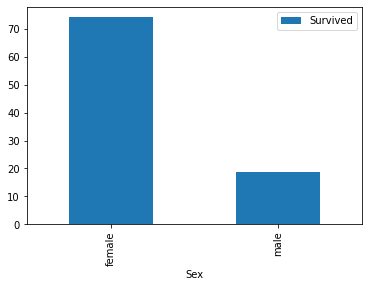

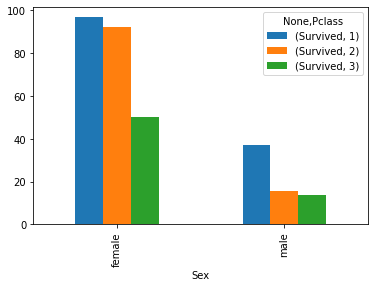

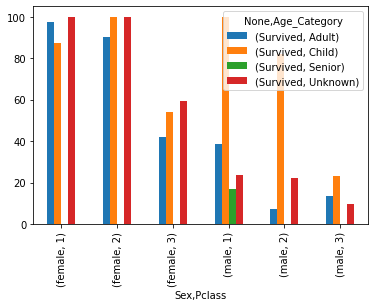

In [35]:
"""
For each subgroup of sex + age category + class, see percentage of that subgroup that survived
"""

# Calculate survival rate AS A PERCENTAGE
df_sex = df_train.groupby('Sex').agg({'Survived': lambda x: x.mean() * 100})
df_sex_pclass = df_train.groupby(['Sex', 'Pclass']).agg({'Survived': lambda x: x.mean() * 100})
df_sex_pclass_agecat = df_train.groupby(['Sex','Pclass', 'Age_Category']).agg({'Survived': lambda x: x.mean()*100})

display (df_sex.plot(kind = 'bar'))
display (df_sex_pclass.unstack().plot(kind = 'bar'))        # Note the use of "unstack()"
display (df_sex_pclass_agecat.unstack().plot(kind = 'bar'))

# df_sex_pclass.plot(kind='bar')
# df_sex_pclass_agecat.plot(kind = 'bar')

# print (df_sex.head())
# print (df_sex_pclass.head())
# print (df_sex_pclass_agecat.head())




In [36]:
# Try a different plotting method to get legend

# WORKING WITH MULTI-INDEXES HOW COOL!

# Go through this guide again: 
#https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.htm



"""
city=['Delhi','Beijing','Washington','Tokyo','Moscow']
Gender=['Male','Female']
pos = np.arange(len(city))
bar_width = 0.35
Happiness_Index_Male=[60,40,70,65,85]
Happiness_Index_Female=[30,60,70,55,75]
 
plt.bar(pos,Happiness_Index_Male,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Happiness_Index_Female,bar_width,color='pink',edgecolor='black')
plt.xticks(pos, city)
plt.xlabel('City', fontsize=16)
plt.ylabel('Happiness_Index', fontsize=16)
plt.title('Group Barchart - Happiness index across cities By Gender',fontsize=18)
plt.legend(Gender,loc=2)
plt.show()
"""


# Calculate survival rate AS A PERCENTAGE
df_sex = df_train.groupby('Sex').agg({'Survived': lambda x: x.mean() * 100})
df_sex_pclass = df_train.groupby(['Sex', 'Pclass']).agg({'Survived': lambda x: x.mean() * 100})
df_sex_pclass_agecat = df_train.groupby(['Sex','Pclass', 'Age_Category']).agg({'Survived': lambda x: x.mean()*100})


display (df_sex_pclass[('female',1):('female',3)])        # This is how to slice with multi-indexes!
display (df_sex_pclass[('male',1): ('male',3)])



indices = pd.MultiIndex.from_tuples(df_sex_pclass.index)
df_sex_pclass = df_sex_pclass.reindex(indices)


Survived
Sex    Pclass           
female 1       96.808511
       2       92.105263
       3       50.000000

Survived
Sex  Pclass           
male 1       36.885246
     2       15.740741
     3       13.544669

               Survived  Died  Survival_Percentage
Sex    Pclass                                     
female 1             91     3            96.808511
       2             70     6            92.105263
       3             72    72            50.000000
male   1             45    77            36.885246
       2             17    91            15.740741
       3             47   300            13.544669


<AxesSubplot:xlabel='Sex'>

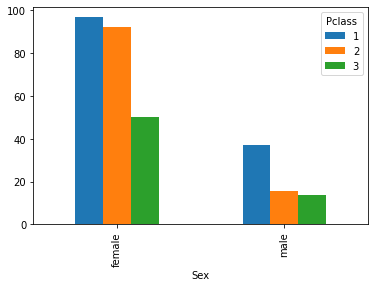

In [37]:
# For each subgroup with features "Sex", "Age_Category", "Pclass", see what percentage of that subgroup survived.




df_sex = df_train.groupby('Sex').agg(Survived = ('Survived', 'sum'), Died = ('Died', 'sum'), Survival_Percentage = ('Survived', lambda x: x.mean() * 100))
df_sex_pclass = df_train.groupby(['Sex', 'Pclass']).agg(Survived = ('Survived', 'sum'), Died = ('Died', 'sum'), Survival_Percentage = ('Survived', lambda x: x.mean() * 100))
df_sex_pclass_agecat = df_train.groupby(['Sex', 'Pclass', 'Age_Category']).agg(Survived = ('Survived', 'sum'), Died = ('Died', 'sum'), Survival_Percentage = ('Survived', lambda x: x.mean() * 100))

#df_sex_pclass.unstack().plot(kind='bar')

# print (df_sex)
print (df_sex_pclass)
# print (df_sex_pclass_agecat)

df_sex_pclass.unstack().plot(y = 'Survival_Percentage', kind='bar')

In [38]:
### FAILED INVESTIGATION ###

# We want to look at the passengers (with missing age) 
# who had a sibling or parent on board (SibSp >0 or Parch > 0)

"""
Ask Killian: 
Is it possible to do a condition like: 
"string1" in df['column name']

Idea is to select rows that contain a particular surname in the 'Name' column.
"""

boolean_not_alone = (df_age_missing['SibSp']>0) | (df_age_missing['Parch']>0)

# Select only relevant columns

df_age_missing = df_age_missing [['Name','Sex', 'Age', 'SibSp', 'Parch']]
df_age_missing[boolean_not_alone].sort_values(by = 'Name')

df_age_missing_not_alone = df_age_missing[boolean_not_alone].sort_values(by = 'Name')
df_age_missing_not_alone

list_surnames = []

for name in df_age_missing_not_alone ['Name']:
    surname = name.split(',')[0]
    if surname not in list_surnames:
        list_surnames.append(surname)

print(list_surnames)


list_surnames_2 = []        # List of names we'll want to further investigate

# for name in list_surnames:
#     for index in range(df_age_missing_not_alone.shape[0]):
#         if name in df_age_missing_not_alone.iloc[index]['Name']:
            
#df_age_missing_not_alone ['Boulos' in df_age_missing_not_alone['Name']]

df_age_missing[boolean_not_alone].shape     # 44 columns

['Boulos', 'Bourke', 'Caram', 'Chibnall', 'Davison', 'Frauenthal', 'Goldenberg', 'Hagland', 'Johnston', 'Kenyon', 'Kiernan', 'Lefebre', 'Lennon', 'McCoy', 'Meyer', 'Moran', 'Moubarek', 'Murphy', "O'Brien", 'Peter', 'Sage', 'Samaan', 'Spencer', 'Taylor', 'Thorneycroft', 'Zabour']


(44, 5)